In [70]:
from tensorflow.keras.models import load_model
###### AE MODEL LOAD ######
ae_wo_classifier = load_model('model/AE_model/KERAS_check_best_model.h5')
ae_wo_classifier_pruned = load_model('model/AE_model/KERAS_check_pruned_best_model.h5')
ae_w_classifier = load_model('model/AE_model/KERAS_check_best_model_classifier.h5')
ae_w_classifier_pruned = load_model('model/AE_model/KERAS_check_pruned_best_model_classifier.h5')

## Check sparsity
Make a quick check that the model was indeed trained sparse. We'll just make a histogram of the weights of the 1st layer, and hopefully observe a large peak in the bin containing '0'. Note logarithmic y axis.

In [116]:
w=ae_w_classifier_pruned.layers[2].weights[0].numpy()
print(w.size)

512


In [124]:
w=ae_w_classifier_pruned.layers[5].weights[0].numpy()

print(np.sum(w==0))

26


% of zeros = 0.0
% of zeros = 0.80078125
% of zeros = 0.0
% of zeros = 0.8125
% of zeros = 0.8125
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0
% of zeros = 0.0


<Figure size 720x216 with 0 Axes>

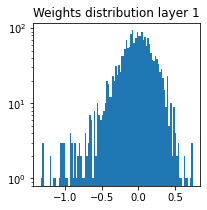

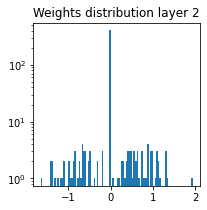

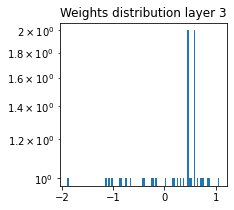

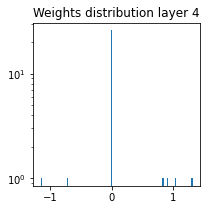

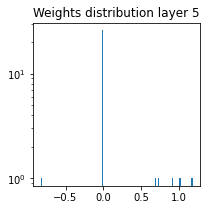

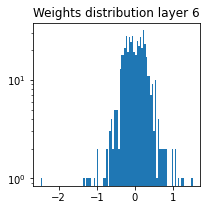

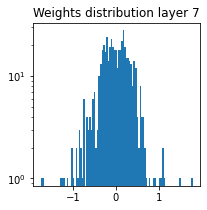

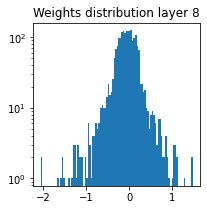

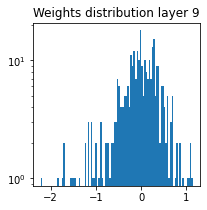

In [75]:
import numpy as np
from matplotlib import pyplot as plt
n = 9
plt.figure(figsize=(10,3))


for i in range(9):  
    w = ae_w_classifier_pruned.layers[i+1].weights[0].numpy()
    h, b = np.histogram(w, bins=100)

    plt.figure(figsize=(3,3))
    plt.bar(b[:-1], h, width=b[1]-b[0])
    plt.semilogy()
    plt.title('Weights distribution layer '+ str(i+1))
    print('% of zeros = {}'.format(np.sum(w==0)/np.size(w)))
    #plt.savefig('./Report/images/section4/weights/weights_dist'+str(i+1)+'.png')
plt.show()

# Make an hls4ml config & model

In [3]:
#import plotting
import hls4ml
config = hls4ml.utils.config_from_keras_model(ae_w_classifier_pruned, granularity='model')
print("-----------------------------------")
print("Configuration")
print(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(ae_w_classifier_pruned,
                                                       hls_config=config,
                                                       output_dir='model/AE_model/hls4ml_prj',
                                                       part='xc250-figd2104-2L-e')
                                                       #part='xcvu9p-flgc2104aaz')


Interpreting Model
Topology:
Layer name: encoder_input, layer type: Input
Layer name: dense_32, layer type: Dense
  -> Activation (relu), layer name: dense_32
Layer name: dense_33, layer type: Dense
  -> Activation (relu), layer name: dense_33
Layer name: encoder_output, layer type: Dense
  -> Activation (relu), layer name: encoder_output
Layer name: dense_34, layer type: Dense
  -> Activation (relu), layer name: dense_34
Layer name: dense_36, layer type: Dense
  -> Activation (relu), layer name: dense_36
Layer name: dense_35, layer type: Dense
  -> Activation (relu), layer name: dense_35
Layer name: dense_37, layer type: Dense
  -> Activation (relu), layer name: dense_37
Layer name: ecoder_output, layer type: Dense
  -> Activation (sigmoid), layer name: ecoder_output
Layer name: classifier_output, layer type: Dense
  -> Activation (softmax), layer name: classifier_output
-----------------------------------
Configuration
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Stra

C:\Users\loren\miniconda3\lib\site-packages\hls4ml\converters\__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [4]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\loren\\AppData\\Local\\Temp\\tmpz324c0_b.png'

# Compile

In [ ]:
hls_model.compile()

# Build

In [ ]:
hls_model.build(csim=False)